In [2314]:
import numpy as np
import matplotlib.pyplot as plt

In [2315]:
def Genaratesamples(m):
        X=np.random.randn(m)*10
        noise=np.random.randn(m)
        y=3*X+5+7*noise
        return X,y

In [2316]:
X,y=Genaratesamples(100)

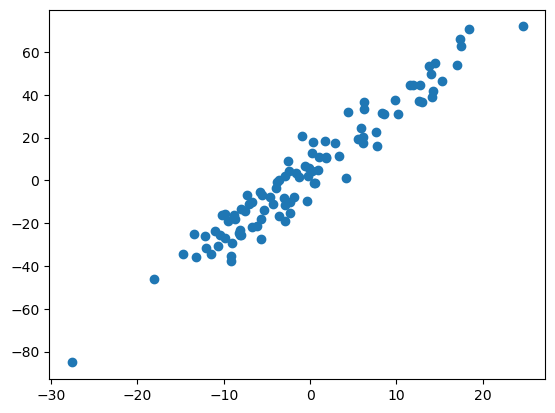

In [2317]:
plt.scatter(X,y)
plt.show()

In [2318]:
X.mean(),X.std()

(-0.46922398545313226, 9.330548267232519)

In [2319]:
X=(X-X.mean())/X.std()


In [2320]:
X.mean(),X.std()

(0.0, 1.0)

In [2321]:
def test_train(X,y,split=0.75):
    m=X.shape[0]
    data=np.zeros((m,2))
    data[:,0]=X
    data[:,1]=y
    np.random.shuffle(data)
    split =int(m*split)
    Xtr=data[:split,0]
    ytr=data[:split,1]
    Xte=data[split: ,0]
    yte=data[split: ,1]
    return Xtr,ytr,Xte,yte

In [2322]:
Xtr,ytr,Xte,yte=test_train(X,y)

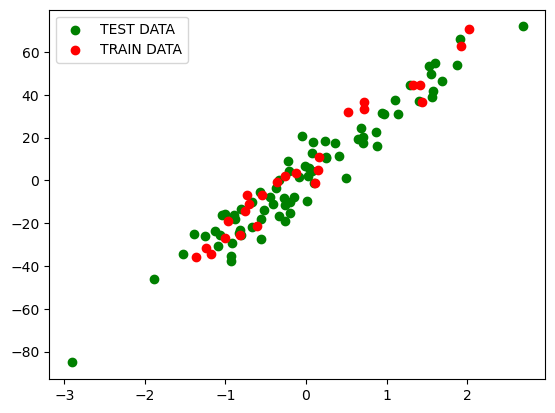

In [2323]:
plt.scatter(Xtr,ytr,color='green',label="TEST DATA")
plt.scatter(Xte,yte,color='red',label="TRAIN DATA")
plt.legend()
plt.show()

In [2419]:
#Model

def hypothesis(X,theta):
    return theta[0]+theta[1]*X

def error(X,y,theta):
    m=X.shape[0]
    e=0
    for i in range(m):
     y_i=hypothesis(X[i],theta)
     e=e+(y[i]-y_i)*2  
    return e/(2*m)

def  gradient(X,y,theta):
     m=X.shape[0]
     grad=np.zeros((2,))
     for i in range(m):
         exp=hypothesis(X[i],theta)-y[i]
         grad[0] =+(exp)
         grad[1] =+(exp)*X[i]
     return grad/m

def  train(X,y,lr=0.9,max=300):
     theta= np.zeros((2,))
     error_list=[]
     for i  in range (max):
         grad=gradient(X,y,theta)
         error_list.append(error(X,y,theta))
         theta[0]=theta[0]-lr*grad[0]
         theta[1]=theta[1]-lr*grad[1]
         
     plt.plot(error_list)
     return theta
                       




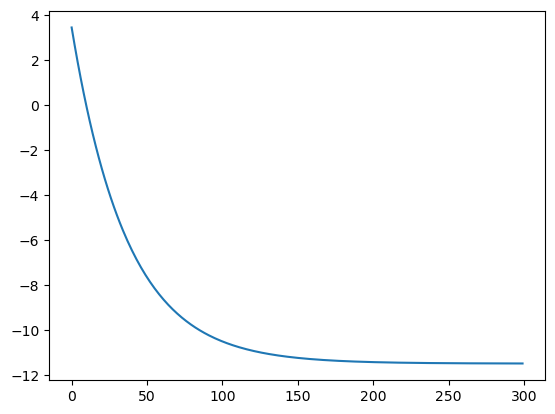

In [2421]:
theta=train(X,y)

In [2423]:
theta

array([14.9478332 , 21.04959625])

In [2425]:
def predict(X,theta):
    return hypothesis(X,theta)

In [2427]:
yp=predict(Xte,theta)

In [2479]:
Xe=np.random.randn(10)

In [2481]:
yw=predict(Xe,theta)

In [2483]:
print(Xe,yw)

[ 1.14542589  0.31119819 -0.3057979   0.17293994 -0.32444029 -0.72043936
  0.21058484 -0.89450288 -0.49822426  0.2166986 ] [39.05858576 21.49842954  8.5109109  18.58814919  8.11849616 -0.21712436
 19.38055898 -3.88109125  4.46041359 19.50925128]


In [2429]:
Xte.shape

(25,)

In [2431]:
yp.shape

(25,)

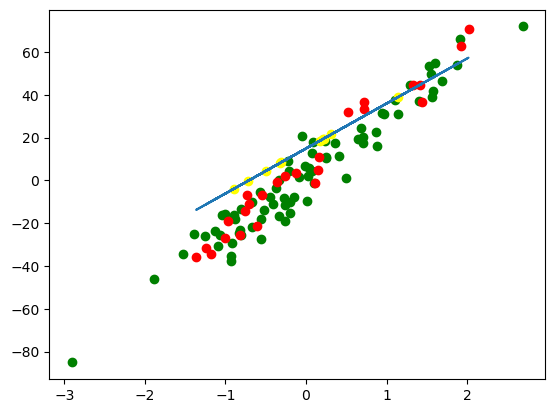

In [2485]:
plt.scatter(Xtr,ytr,color='green',label="TEST DATA")
plt.scatter(Xte,yte,color='red',label="TRAIN DATA")
plt.scatter(Xe,yw,color='yellow')
plt.plot(Xte,yp)

In [2449]:
def r2score(y,yp):
    ymean=y.mean()
    num=np.sum((y-yp)**2)
    denum=np.sum((y-ymean)**2)
    return  1 - num/denum

In [2451]:
r2score(yte,yp)

0.7915620490378953